In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import sent_tokenize
import ast
from tqdm import tqdm

### BERT Embedding과 TF-IDF로 제목<->본문의 각 문장에 대해서 Cosine-Similarity 계산한 DataFrame

In [6]:
train_similarity_calculated = pd.read_csv("dataset/no_length_limit/source/train_similarity_calculated.csv")

In [7]:
train_similarity_calculated.head(10)

,title,subtitle,body,original_body_sent_len,category,classcode1,title_bert_cosine,title_tfidf_cosine,subtitle_bert_cosine,subtitle_tfidf_cosine,title_subtitle_bert_cosine
0,"여야, 국회일정 신경전…北어선·교과서 국정조사 새 변수","민주당, 이번주내 교섭단체 대표 연설 완료…국정조사 요구엔 선 긋기한국·바른미래, ...",여야는 1일 6월 임시국회의 일정 조정 문제를 놓고 신경전을 이어갔다. 국회 정치개...,25.0,1,101001,"[0.16501060128211975, 0.2144443690776825, 0.25...","[0.17116009904783333, 0.12326769965859867, 0.1...","[0.8110069036483765, 0.789739727973938, 0.8278...","[0.029843902575832734, 0.09376820875153366, 0....",[0.40811068]
1,모레부터 AZ 잔여백신 60세이상에 우선 접종…얀센도 고령층부터,백신 선택권은 없어…일별로 마지막병 잔여량 네이버-카카오앱에 공개,오는 4일부터는 신종 코로나바이러스 잔여백신이 주로 60세 이상에게 배정된다. 60...,24.0,3,501001,"[0.25192150473594666, 0.7268584966659546, 0.36...","[0.08961682950335154, 0.04702007242364482, 0.0...","[0.41531962156295776, 0.4323447644710541, 0.28...","[0.037331556331034174, 0.09834899288608381, 0....",[0.80861115]
2,PRNewswire ZTE unveils worlds first under-disp...,5G,ZTE unveils worlds first under-display camera...,45.0,6,1101001,"[0.5551855564117432, 0.6590642929077148, 0.531...","[0.8660271658972158, 0.8448164715794095, 0.701...","[0.8248683214187622, 0.9060651063919067, 0.793...","[0.05842761134105691, 0.06764806603461025, 0.1...",[0.5999161]
3,"HDC현산, 아시아나에 인수상황 재점검 위한 재실사 요구","""4월 초부터 15차례 재점검 요청했으나 자료 제공받지 못해"" 주장",HDC현대산업개발이 금호산업과 아시아나항공에 아시아나항공 인수상황 재점검을 위한 재...,8.0,2,201001,"[0.061825476586818695, 0.3415713608264923, 0.7...","[0.5479793329857061, 0.1254368961604195, 0.249...","[0.5832200050354004, 0.6922324895858765, 0.617...","[0.07697718827297095, 0.027169890803990474, 0....",[0.46224254]
4,"불안한 세입자 ""전세금 돌려달라"" 늘어나는 주택임대차 분쟁",작년 임대차분쟁조정위원회 접수 건 71%가 전세금 반환…서울도 늘어임대인 불응시 조...,1. 서울 강서구 화곡동에 거주하는 A씨는 지난해 6월로 전세만기가 끝났는데 집주인...,45.0,2,204001,"[0.4421197772026062, 0.7669296264648438, 0.684...","[0.0, 0.01877787963551273, 0.09835220383973753...","[0.1654372364282608, 0.6296941041946411, 0.429...","[0.0, 0.03597750451100432, 0.14558209301888117...",[0.87434787]
5,"상한제 앞둔 서울 아파트, 매물 품귀·호가 상승 이상현상",정부 합동단속에도 10월 서울 아파트값 9·13대책 이후 최대폭 올라상한제 공급 부...,"민간택지 분양가 상한제 개정안이 지난달 29일부터 시행되고, 대상지역 선정이 임박했...",54.0,2,201012,"[0.7566341161727905, 0.6388250589370728, 0.793...","[0.12664534297468605, 0.09179445224378499, 0.1...","[0.42208537459373474, 0.5092849731445312, 0.51...","[0.05337281576958315, 0.22704473523315594, 0.0...",[0.6891257]
6,내일도 수도권·충청권 미세먼지 비상저감조치…차량은 정상운행,서울 등 사흘·대전 이틀 연속…화력 발전 출력 제한,일요일인 3일에도 수도권과 충청권에서 고농도 미세먼지 비상저감조치가 시행된다. 환경...,13.0,3,501001,"[0.3541224002838135, 0.34656837582588196, 0.38...","[0.3101452046043386, 0.24728717219961785, 0.14...","[0.6596802473068237, 0.7474320530891418, 0.739...","[0.0, 0.0421125381195331, 0.01741228998916455,...",[0.56762636]
7,"탄핵 거론 美공화의원, 독립기념일에 독립 선언…전격 탈당","어마시 하원의원 ""정당정치 환멸""…트럼프 ""공화당에 좋은 뉴스"" 조롱2020년 대선...",미국 공화당 내에서 유일하게 도널드 트럼프 대통령의 탄핵을 거론했던 저스틴 어마시 ...,19.0,6,1101001,"[0.6801791191101074, 0.734478771686554, 0.7472...","[0.21608676343750016, 0.3781883889419847, 0.10...","[0.4088497757911682, 0.5739260911941528, 0.591...","[0.1274123552157962, 0.11575375975740693, 0.07...",[0.70329905]
8,"터전 잃은 수해 주민들 일상 되찾아…""정겨운 추석 기대""","전남 구례 이재민, 임시주택 마련해 추석 준비구례 오일장 상인들, 대목장 신바람","""임시주택이라도 있어서 아들과 함께 추석을 보낼 수 있겠네요."" 추석 연휴를 이틀 ...",17.0,7,501001,"[0.8254619836807251, 0.7403281331062317, 0.772...","[0.11566649324986719, 0.023144616986380685, 0....","[0.03454180806875229, -0.13156481087207794, -0...","[0.06141203576143011, 0.2893626540310936, 0.06...",[0.32839486]
9,비폭력 신념 따른 예비군훈련 거부 첫 무죄 확정,"""종교적 이유 아닌 개인적인 신념도 인정한 첫 판례""",비폭력 신념을 이유로 예비군 훈련을 거부한 남성에게 무죄가 확정됐다. 종교적 이유가...,21.0,3,501001,"[0.672812819480896, 0.7345304489135742, 0.8153...","[0.5106455796925354, 0.2639960759165282, 0.153...","[0.6699429154396057, 0.7971206307411194, 0.674...","[0.08623976934073685, 0.41548145568543665, 0.0...",[0.7808049]


In [5]:
train_similarity_calculated

,title,subtitle,body,original_body_sent_len,category,classcode1,title_bert_cosine,title_tfidf_cosine,subtitle_bert_cosine,subtitle_tfidf_cosine,title_subtitle_bert_cosine
0,"여야, 국회일정 신경전…北어선·교과서 국정조사 새 변수","민주당, 이번주내 교섭단체 대표 연설 완료…국정조사 요구엔 선 긋기한국·바른미래, ...",여야는 1일 6월 임시국회의 일정 조정 문제를 놓고 신경전을 이어갔다. 국회 정치개...,25.0,1,101001,"[0.16501060128211975, 0.2144443690776825, 0.25...","[0.17116009904783333, 0.12326769965859867, 0.1...","[0.8110069036483765, 0.789739727973938, 0.8278...","[0.029843902575832734, 0.09376820875153366, 0....",[0.40811068]
1,모레부터 AZ 잔여백신 60세이상에 우선 접종…얀센도 고령층부터,백신 선택권은 없어…일별로 마지막병 잔여량 네이버-카카오앱에 공개,오는 4일부터는 신종 코로나바이러스 잔여백신이 주로 60세 이상에게 배정된다. 60...,24.0,3,501001,"[0.25192150473594666, 0.7268584966659546, 0.36...","[0.08961682950335154, 0.04702007242364482, 0.0...","[0.41531962156295776, 0.4323447644710541, 0.28...","[0.037331556331034174, 0.09834899288608381, 0....",[0.80861115]
2,PRNewswire ZTE unveils worlds first under-disp...,5G,ZTE unveils worlds first under-display camera...,45.0,6,1101001,"[0.5551855564117432, 0.6590642929077148, 0.531...","[0.8660271658972158, 0.8448164715794095, 0.701...","[0.8248683214187622, 0.9060651063919067, 0.793...","[0.05842761134105691, 0.06764806603461025, 0.1...",[0.5999161]
3,"HDC현산, 아시아나에 인수상황 재점검 위한 재실사 요구","""4월 초부터 15차례 재점검 요청했으나 자료 제공받지 못해"" 주장",HDC현대산업개발이 금호산업과 아시아나항공에 아시아나항공 인수상황 재점검을 위한 재...,8.0,2,201001,"[0.061825476586818695, 0.3415713608264923, 0.7...","[0.5479793329857061, 0.1254368961604195, 0.249...","[0.5832200050354004, 0.6922324895858765, 0.617...","[0.07697718827297095, 0.027169890803990474, 0....",[0.46224254]
4,"불안한 세입자 ""전세금 돌려달라"" 늘어나는 주택임대차 분쟁",작년 임대차분쟁조정위원회 접수 건 71%가 전세금 반환…서울도 늘어임대인 불응시 조...,1. 서울 강서구 화곡동에 거주하는 A씨는 지난해 6월로 전세만기가 끝났는데 집주인...,45.0,2,204001,"[0.4421197772026062, 0.7669296264648438, 0.684...","[0.0, 0.01877787963551273, 0.09835220383973753...","[0.1654372364282608, 0.6296941041946411, 0.429...","[0.0, 0.03597750451100432, 0.14558209301888117...",[0.87434787]
...,...,...,...,...,...,...,...,...,...,...,...
192622,"화이자 백신접종 1호 90세 할머니 ""매우 기뻐…최고 생일선물""","""새해에는 가족·친구 만남 고대…백신 맞아라""첫 접종 간호사 ""터널의 끝에서 빛이 ...",미국 제약사 화이자와 독일 바이오엔테크가 공동개발한 신종 코로나바이러스 감염증 백신...,19.0,6,507002,"[0.7249496579170227, 0.5396753549575806, 0.525...","[0.13215535391981023, 0.10623806200458971, 0.0...","[0.7308940887451172, 0.5308196544647217, 0.534...","[0.10194637225439272, 0.04641863932934237, 0.0...",[0.9542332]
192623,지성과 의학드라마가 만났으니…SBS 의사요한 10％ 돌파,막장극 계보 따른 MBC 황금정원 4.5％-7.2％ 출발,SBS TV 금토극 의사요한이 방송 2회 만에 시청률 10% 고지를 넘어섰다. 21...,19.0,4,701001,"[0.6445115804672241, 0.9376134276390076, 0.865...","[0.3426526034059211, 0.09030437168505422, 0.0,...","[0.7049786448478699, 0.976538896560669, 0.8727...","[0.07999497630122085, 0.030688164574288593, 0....",[0.96748847]
192624,"중국, 아세안 회의 앞두고 ""미국이 지역 협력 해쳐""","""바이든 정부의 아태정책에 대해 말하기는 이르다""",중국이 아세안 등을 상대로 우군 확보를 시도하면서 미국이 지역 협력을 해친다고 비난...,14.0,6,1101001,"[0.5795140266418457, 0.3737255930900574, 0.696...","[0.3454619311204881, 0.17824416976200436, 0.07...","[0.6208178997039795, 0.4485797882080078, 0.593...","[0.08245847920564085, 0.023993228036522738, 0....",[0.749894]
192625,"日신문 ""한국 젊은 사원들, 오전 9시 화장실로 뛰어간다""","동학개미 투자 열풍 소개…""거품경제 절정기 일본과 흡사""","""일본이 1980년대 말 경험한 거품과 닮은 상황으로 언젠가 조정국면이 온다. 거품...",17.0,6,1101001,"[0.6429193615913391, 0.5443703532218933, 0.872...","[0.03128377097831386, 0.07631353990325146, 0.0...","[0.7322091460227966, 0.5926723480224609, 0.932...","[0.06568963625721826, 0.08058151768007774, 0.1...",[0.922715]


In [8]:
cosine_list = train_similarity_calculated.columns.tolist()[6:]
df_list = [train_similarity_calculated, test_similarity_calculated, infer_similarity_calculated]

In [9]:
arr_ast = lambda x : np.array(ast.literal_eval(x)) # str >> list
to_list = lambda x : x.tolist()

In [10]:
# ast.literal_eval로 string > np.array로 바꿔주기
for df in tqdm(df_list):
	for cosine in cosine_list:
		df[cosine] = df[cosine].apply(arr_ast)
'''
# np.array > list
for df in tqdm(df_list):
	for cosine in cosine_list:
		df[cosine] = df[cosine].apply(to_list)'''

100%|██████████| 3/3 [00:40<00:00, 13.39s/it]


'\n# np.array > list\nfor df in tqdm(df_list):\n\tfor cosine in cosine_list:\n\t\tdf[cosine] = df[cosine].apply(to_list)'

### Lead Bias를 보여주는 실험

In [11]:
# max_len 기준으로 cosine similarity list padding
# max_len 243 : sub+body
# max_len 242 : body 
def fill_cosine_similarity(x, max_len=243):
    rank_pad = np.pad(x, (0,max_len-len(x)), 'constant', constant_values=(0))
    return rank_pad

In [12]:
# 해당 index에 문장이 존재할 경우 1, 아니면 0
def get_one_zero_pad(x, max_len=243):
    one_zero_pad = np.where(x!=0, 1, 0) 
    return one_zero_pad

In [13]:
train_similarity_calculated

,title,subtitle,body,original_body_sent_len,category,classcode1,title_bert_cosine,title_tfidf_cosine,subtitle_bert_cosine,subtitle_tfidf_cosine,title_subtitle_bert_cosine
0,"여야, 국회일정 신경전…北어선·교과서 국정조사 새 변수","민주당, 이번주내 교섭단체 대표 연설 완료…국정조사 요구엔 선 긋기한국·바른미래, ...",여야는 1일 6월 임시국회의 일정 조정 문제를 놓고 신경전을 이어갔다. 국회 정치개...,25.0,1,101001,"[0.16501060128211975, 0.2144443690776825, 0.25...","[0.17116009904783333, 0.12326769965859867, 0.1...","[0.8110069036483765, 0.789739727973938, 0.8278...","[0.029843902575832734, 0.09376820875153366, 0....",[0.40811068]
1,모레부터 AZ 잔여백신 60세이상에 우선 접종…얀센도 고령층부터,백신 선택권은 없어…일별로 마지막병 잔여량 네이버-카카오앱에 공개,오는 4일부터는 신종 코로나바이러스 잔여백신이 주로 60세 이상에게 배정된다. 60...,24.0,3,501001,"[0.25192150473594666, 0.7268584966659546, 0.36...","[0.08961682950335154, 0.04702007242364482, 0.0...","[0.41531962156295776, 0.4323447644710541, 0.28...","[0.037331556331034174, 0.09834899288608381, 0....",[0.80861115]
2,PRNewswire ZTE unveils worlds first under-disp...,5G,ZTE unveils worlds first under-display camera...,45.0,6,1101001,"[0.5551855564117432, 0.6590642929077148, 0.531...","[0.8660271658972158, 0.8448164715794095, 0.701...","[0.8248683214187622, 0.9060651063919067, 0.793...","[0.05842761134105691, 0.06764806603461025, 0.1...",[0.5999161]
3,"HDC현산, 아시아나에 인수상황 재점검 위한 재실사 요구","""4월 초부터 15차례 재점검 요청했으나 자료 제공받지 못해"" 주장",HDC현대산업개발이 금호산업과 아시아나항공에 아시아나항공 인수상황 재점검을 위한 재...,8.0,2,201001,"[0.061825476586818695, 0.3415713608264923, 0.7...","[0.5479793329857061, 0.1254368961604195, 0.249...","[0.5832200050354004, 0.6922324895858765, 0.617...","[0.07697718827297095, 0.027169890803990474, 0....",[0.46224254]
4,"불안한 세입자 ""전세금 돌려달라"" 늘어나는 주택임대차 분쟁",작년 임대차분쟁조정위원회 접수 건 71%가 전세금 반환…서울도 늘어임대인 불응시 조...,1. 서울 강서구 화곡동에 거주하는 A씨는 지난해 6월로 전세만기가 끝났는데 집주인...,45.0,2,204001,"[0.4421197772026062, 0.7669296264648438, 0.684...","[0.0, 0.01877787963551273, 0.09835220383973753...","[0.1654372364282608, 0.6296941041946411, 0.429...","[0.0, 0.03597750451100432, 0.14558209301888117...",[0.87434787]
...,...,...,...,...,...,...,...,...,...,...,...
192622,"화이자 백신접종 1호 90세 할머니 ""매우 기뻐…최고 생일선물""","""새해에는 가족·친구 만남 고대…백신 맞아라""첫 접종 간호사 ""터널의 끝에서 빛이 ...",미국 제약사 화이자와 독일 바이오엔테크가 공동개발한 신종 코로나바이러스 감염증 백신...,19.0,6,507002,"[0.7249496579170227, 0.5396753549575806, 0.525...","[0.13215535391981023, 0.10623806200458971, 0.0...","[0.7308940887451172, 0.5308196544647217, 0.534...","[0.10194637225439272, 0.04641863932934237, 0.0...",[0.9542332]
192623,지성과 의학드라마가 만났으니…SBS 의사요한 10％ 돌파,막장극 계보 따른 MBC 황금정원 4.5％-7.2％ 출발,SBS TV 금토극 의사요한이 방송 2회 만에 시청률 10% 고지를 넘어섰다. 21...,19.0,4,701001,"[0.6445115804672241, 0.9376134276390076, 0.865...","[0.3426526034059211, 0.09030437168505422, 0.0,...","[0.7049786448478699, 0.976538896560669, 0.8727...","[0.07999497630122085, 0.030688164574288593, 0....",[0.96748847]
192624,"중국, 아세안 회의 앞두고 ""미국이 지역 협력 해쳐""","""바이든 정부의 아태정책에 대해 말하기는 이르다""",중국이 아세안 등을 상대로 우군 확보를 시도하면서 미국이 지역 협력을 해친다고 비난...,14.0,6,1101001,"[0.5795140266418457, 0.3737255930900574, 0.696...","[0.3454619311204881, 0.17824416976200436, 0.07...","[0.6208178997039795, 0.4485797882080078, 0.593...","[0.08245847920564085, 0.023993228036522738, 0....",[0.749894]
192625,"日신문 ""한국 젊은 사원들, 오전 9시 화장실로 뛰어간다""","동학개미 투자 열풍 소개…""거품경제 절정기 일본과 흡사""","""일본이 1980년대 말 경험한 거품과 닮은 상황으로 언젠가 조정국면이 온다. 거품...",17.0,6,1101001,"[0.6429193615913391, 0.5443703532218933, 0.872...","[0.03128377097831386, 0.07631353990325146, 0.0...","[0.7322091460227966, 0.5926723480224609, 0.932...","[0.06568963625721826, 0.08058151768007774, 0.1...",[0.922715]


In [15]:
train_similarity_calculated['title_bert_cosine_extended'] = train_similarity_calculated['title_bert_cosine'].apply(fill_cosine_similarity)
train_similarity_calculated['title_bert_cosine_one_zero_pad'] = train_similarity_calculated['title_bert_cosine_extended'].apply(get_one_zero_pad)

In [16]:
title_bert_cosine_sum = np.sum(train_similarity_calculated['title_bert_cosine_extended'].values, axis=0)
title_bert_cosine_one_zero_sum = np.sum(train_similarity_calculated['title_bert_cosine_one_zero_pad'].values, axis=0) 

In [17]:
title_bert_cosine_sum_avg = title_bert_cosine_sum/title_bert_cosine_one_zero_sum # 특정 index에 문장이 있는 경우에만 고려해서 평균을 구함
title_subtitle_cosine_avg =  np.sum(train_similarity_calculated['title_subtitle_bert_cosine'].values, axis=0)/len(train_similarity_calculated)
title_subtitle_body_cos_list_not_scaled = title_subtitle_cosine_avg.tolist() + (title_bert_cosine_sum/len(train_similarity_calculated)).tolist() # 전체 데이터개수로 나누어주어서 평균을 구함

In [18]:
for i in tqdm(range(len(train_similarity_calculated))):
    train_similarity_calculated['title_bert_cosine_extended'].iloc[i] = np.concatenate([train_similarity_calculated['title_subtitle_bert_cosine'].iloc[i],train_similarity_calculated['title_bert_cosine_extended'].iloc[i]], axis=0)

  0%|          | 0/192627 [00:00<?, ?it/s]/tmp/ipykernel_132481/1766545371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_similarity_calculated['title_bert_cosine_extended'].iloc[i] = np.concatenate([train_similarity_calculated['title_subtitle_bert_cosine'].iloc[i],train_similarity_calculated['title_bert_cosine_extended'].iloc[i]], axis=0)
100%|██████████| 192627/192627 [17:55<00:00, 179.05it/s]


### Title과 Subtitle+Body의 BERT CLS Cosine - BoxPlot Version (0 index indicates subtitle)

In [19]:
BERT_cosine_similarity_dataframe = pd.DataFrame(train_similarity_calculated['title_bert_cosine_extended'].values.tolist())

In [20]:
BERT_cosine_similarity_dataframe[[i for i in range(100)]]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.408111,0.165011,0.214444,0.255402,0.264869,0.349627,0.577364,0.169288,0.015958,0.152536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.808611,0.251922,0.726858,0.369132,0.322153,0.479425,0.554380,0.028507,0.548251,0.470639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.599916,0.555186,0.659064,0.531968,0.773007,0.678007,0.947460,0.641918,0.917034,0.899909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.462243,0.061825,0.341571,0.767235,-0.018149,0.085470,0.801035,0.702635,0.259976,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.874348,0.442120,0.766930,0.684566,0.475787,0.680494,0.618447,0.463400,0.546607,0.521844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192622,0.954233,0.724950,0.539675,0.525596,0.858100,0.823992,0.794582,0.791779,0.857097,0.627741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192623,0.967488,0.644512,0.937613,0.865638,0.829715,0.208196,0.891123,0.845742,0.790121,0.652857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192624,0.749894,0.579514,0.373726,0.696657,0.828192,0.796062,0.817309,0.855526,0.928444,0.052759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192625,0.922715,0.642919,0.544370,0.872884,0.917607,0.782997,0.870153,0.441866,0.876103,0.907460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
BERT_cosine_similarity_dataframe[19].value_counts()[0] / len(BERT_cosine_similarity_dataframe)

0.7553354410337076

#### Box plot with all sentences in body

<AxesSubplot:>

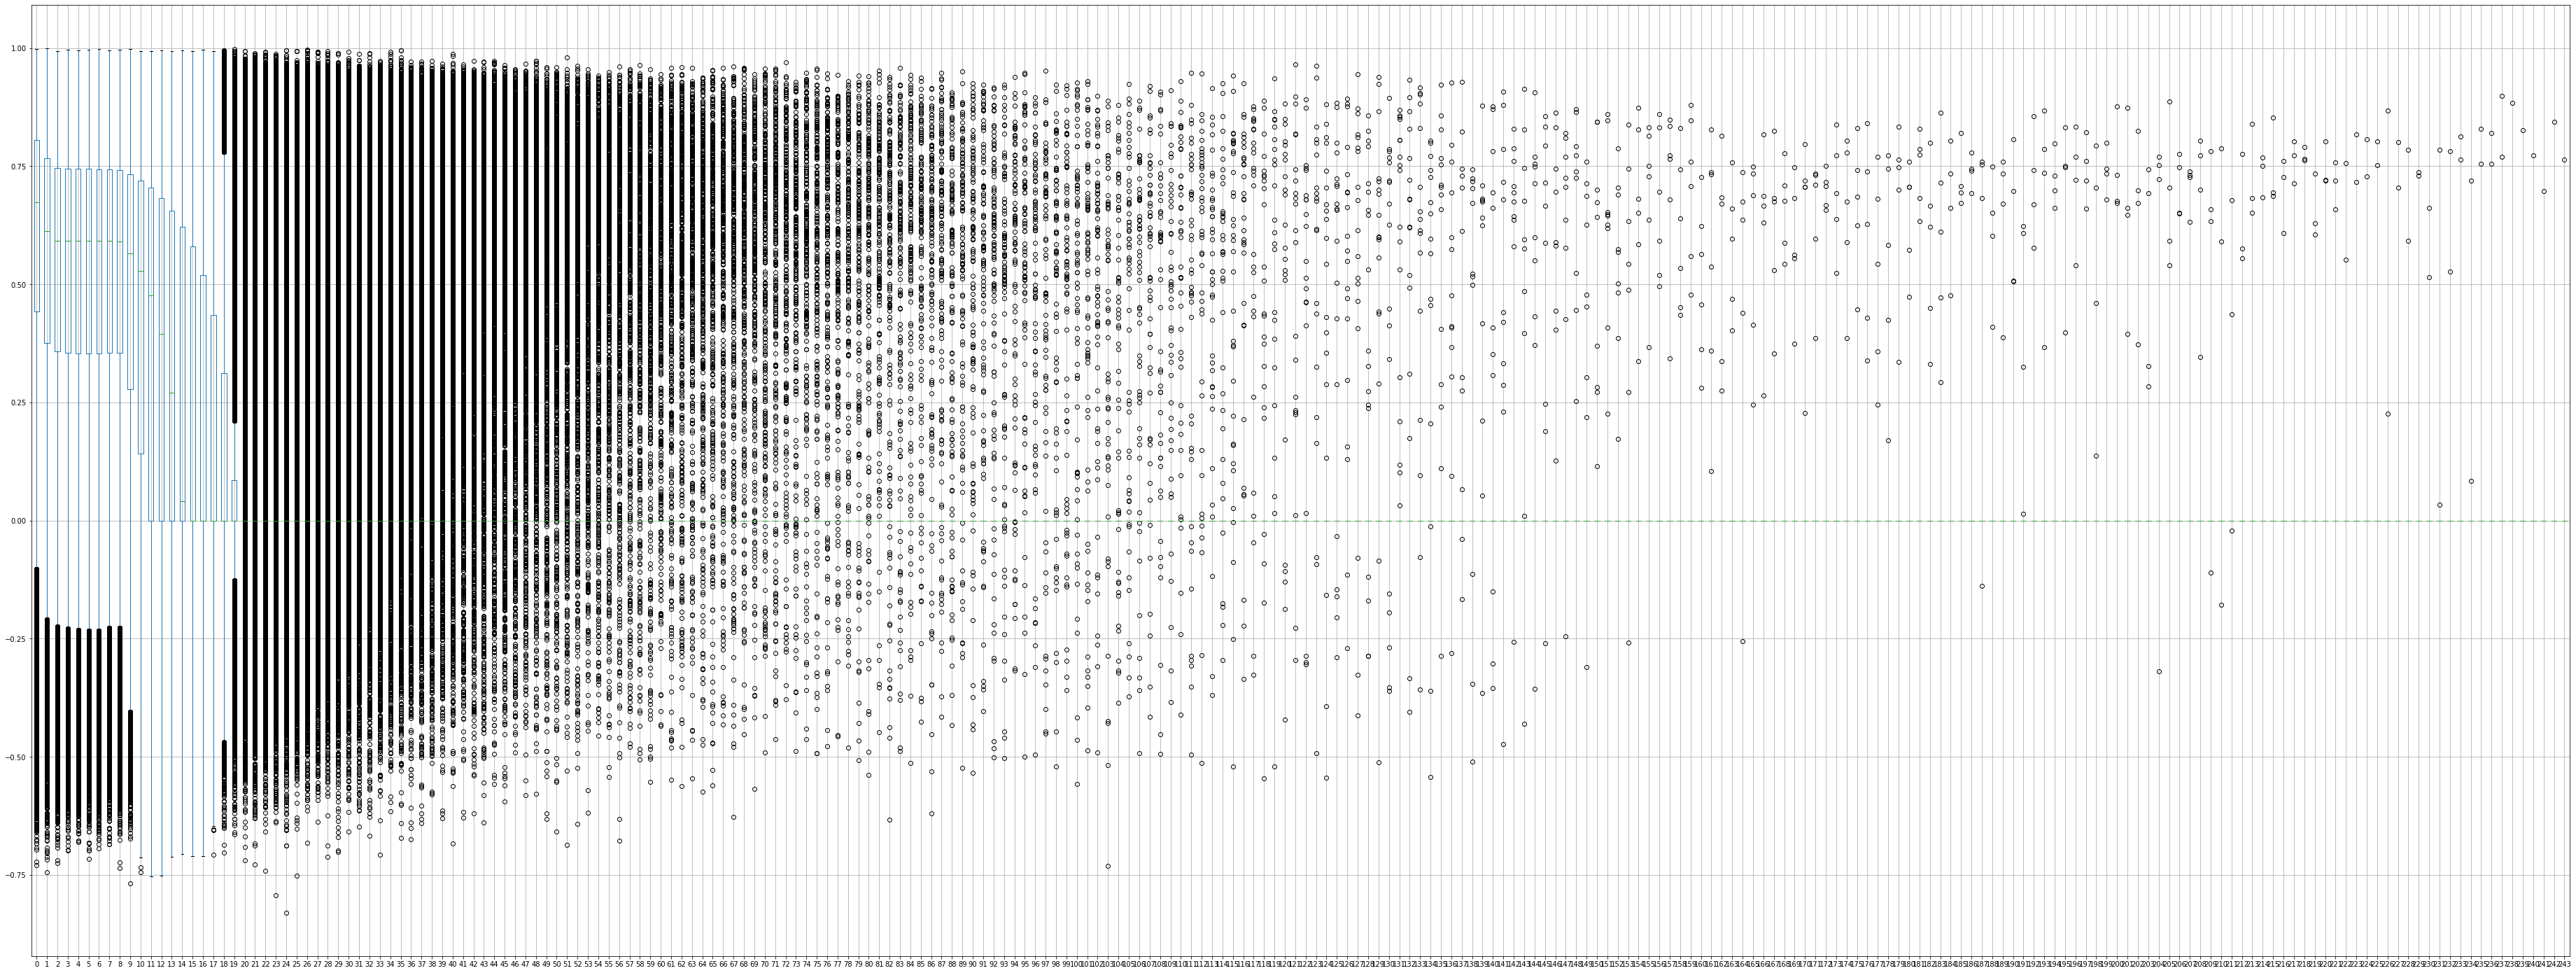

In [21]:
BERT_cosine_similarity_dataframe.boxplot(figsize=(65,25))

#### Box plot with first 30 sentences in body

<AxesSubplot:>

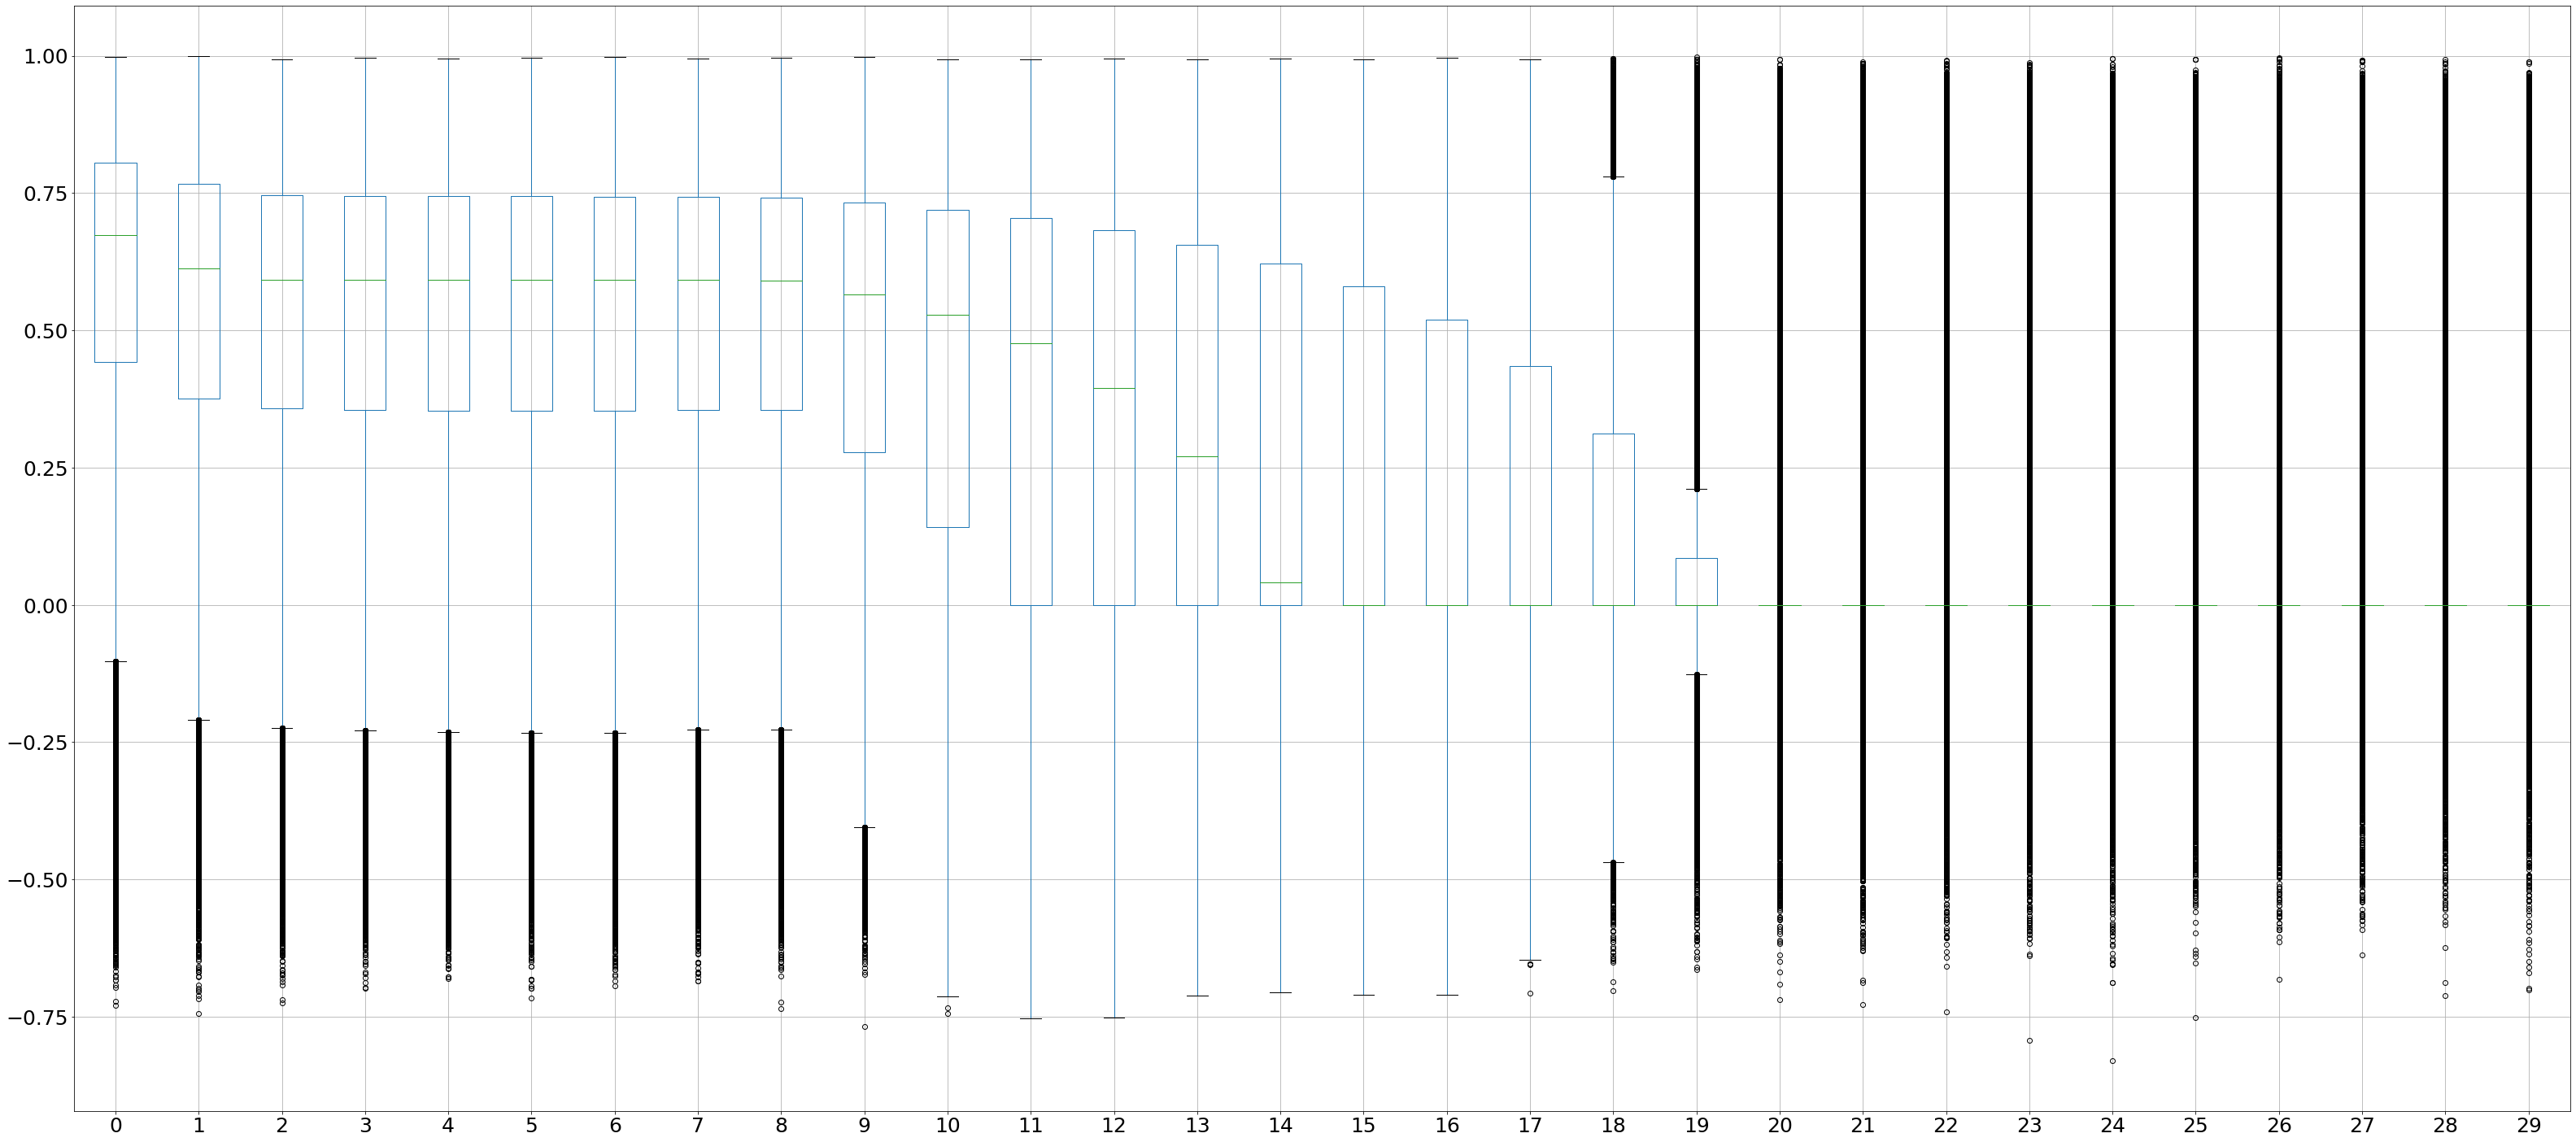

In [23]:
tmp = BERT_cosine_similarity_dataframe[[i for i in range(30)]]
tmp.boxplot(figsize=(55,25), fontsize=25)

### Subitle과 Body의 BERT CLS Cosine - BoxPlot Version

In [24]:
train_similarity_calculated['subtitle_bert_cosine_extended'] = train_similarity_calculated['subtitle_bert_cosine'].apply(fill_cosine_similarity)
BERT_cosine_similarity_dataframe_subtitle = pd.DataFrame(train_similarity_calculated['subtitle_bert_cosine_extended'].values.tolist())
BERT_cosine_similarity_dataframe_subtitle

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,0.811007,0.789740,0.827891,0.481231,0.830492,0.482844,0.788225,0.814530,0.810588,0.701806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.415320,0.432345,0.287452,0.313644,0.188533,0.327575,0.088775,0.314681,0.700722,0.353619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.824868,0.906065,0.793757,0.652227,0.920215,0.624545,0.891587,0.622836,0.655255,0.853344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.583220,0.692232,0.617098,0.511273,0.658479,0.387251,0.384265,0.000290,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.165437,0.629694,0.429796,0.321325,0.461798,0.370023,0.182369,0.303078,0.234928,0.388161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192622,0.730894,0.530820,0.534814,0.864170,0.804107,0.808323,0.773175,0.853531,0.606302,0.822981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192623,0.704979,0.976539,0.872706,0.868182,0.223854,0.916535,0.888702,0.841314,0.701593,0.932184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192624,0.620818,0.448580,0.593274,0.865825,0.652599,0.836364,0.708579,0.793580,0.433835,0.839627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192625,0.732209,0.592672,0.932368,0.884692,0.777311,0.887500,0.501251,0.889366,0.947167,0.795737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Box plot with all sentences in body

<AxesSubplot:>

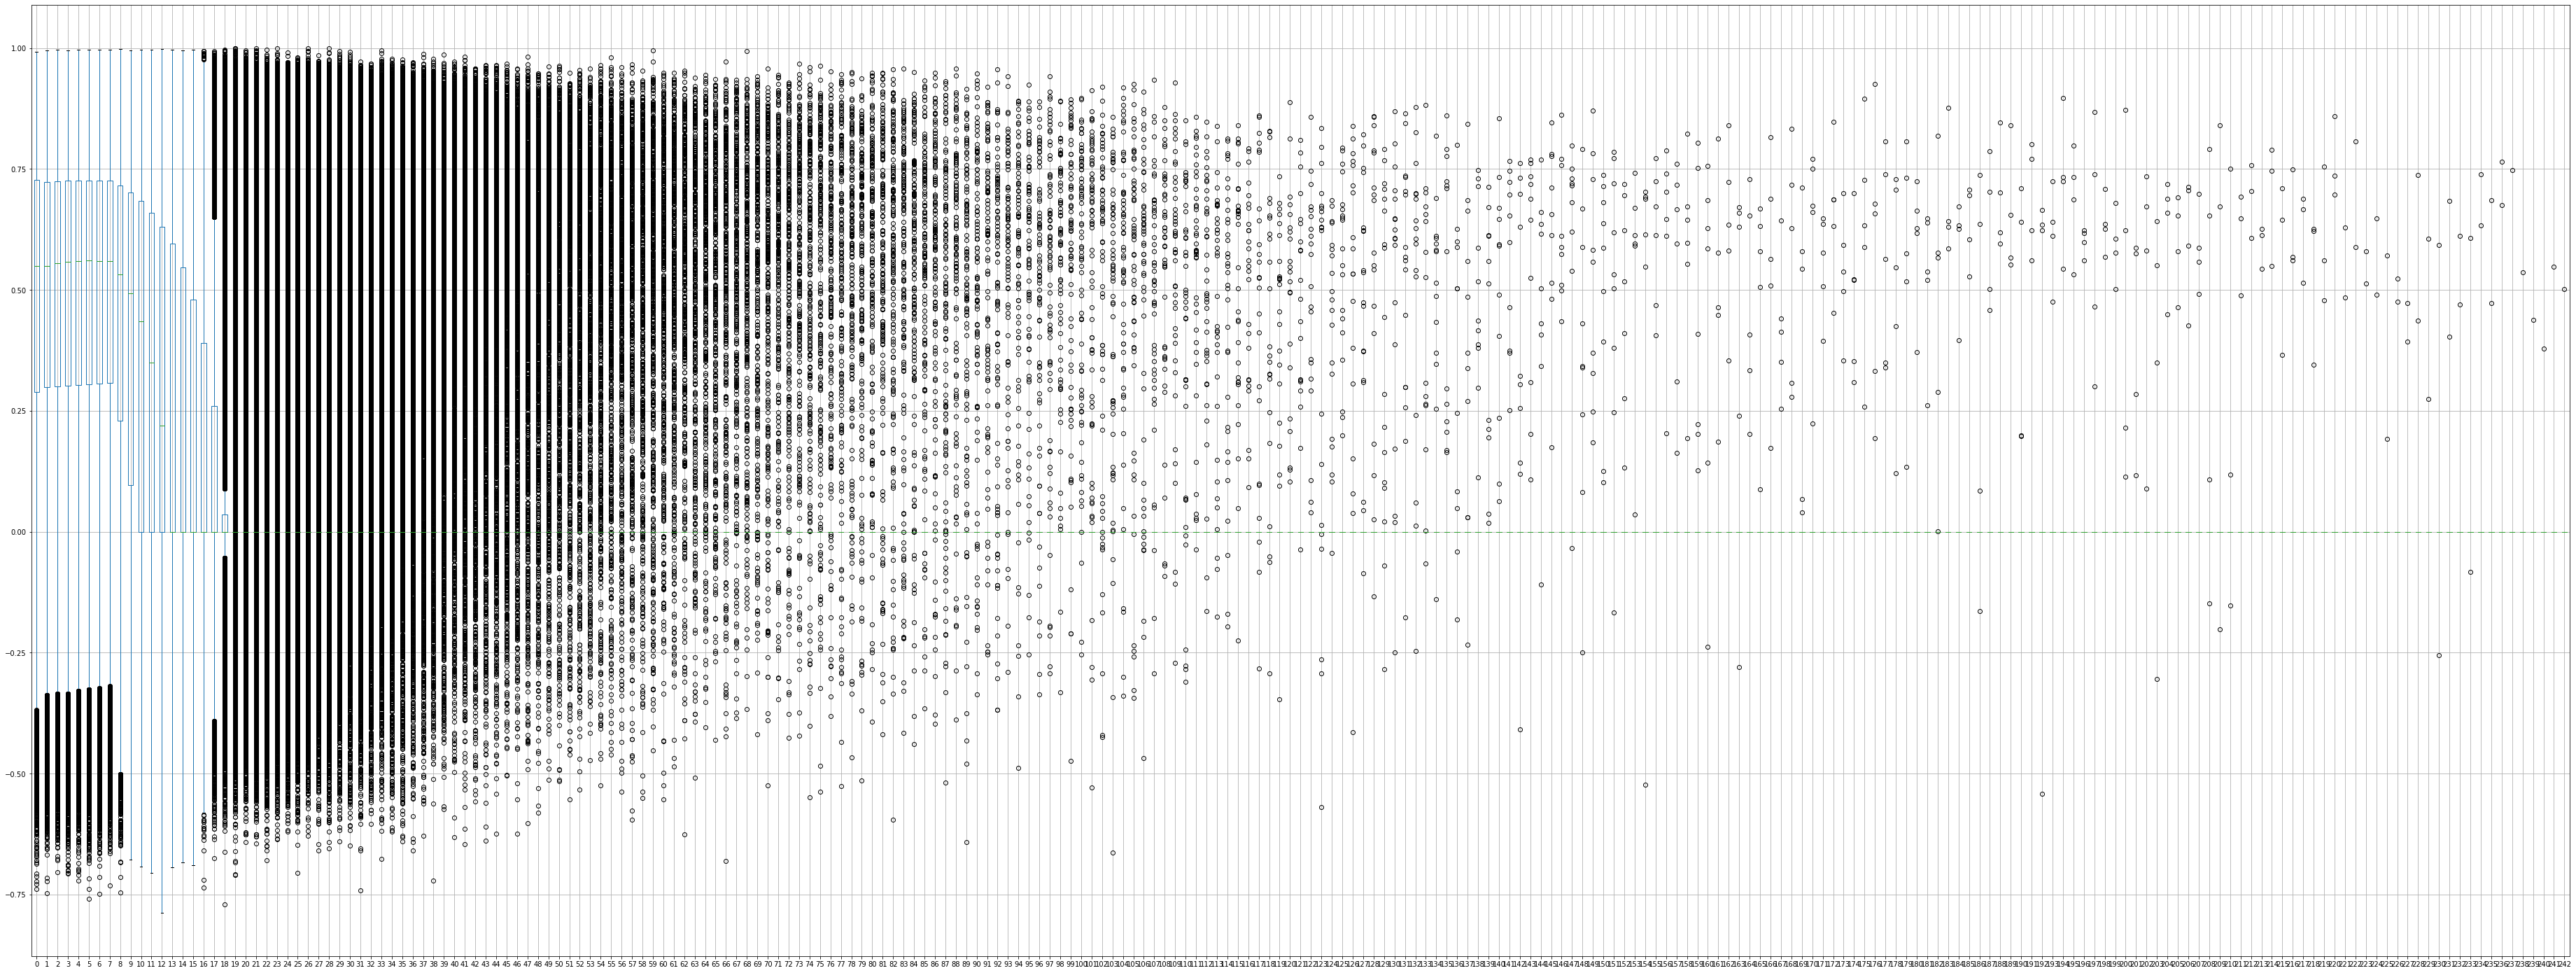

In [25]:
BERT_cosine_similarity_dataframe_subtitle.boxplot(figsize=(65,25))

#### Box plot with first 30 sentences in body

<AxesSubplot:>

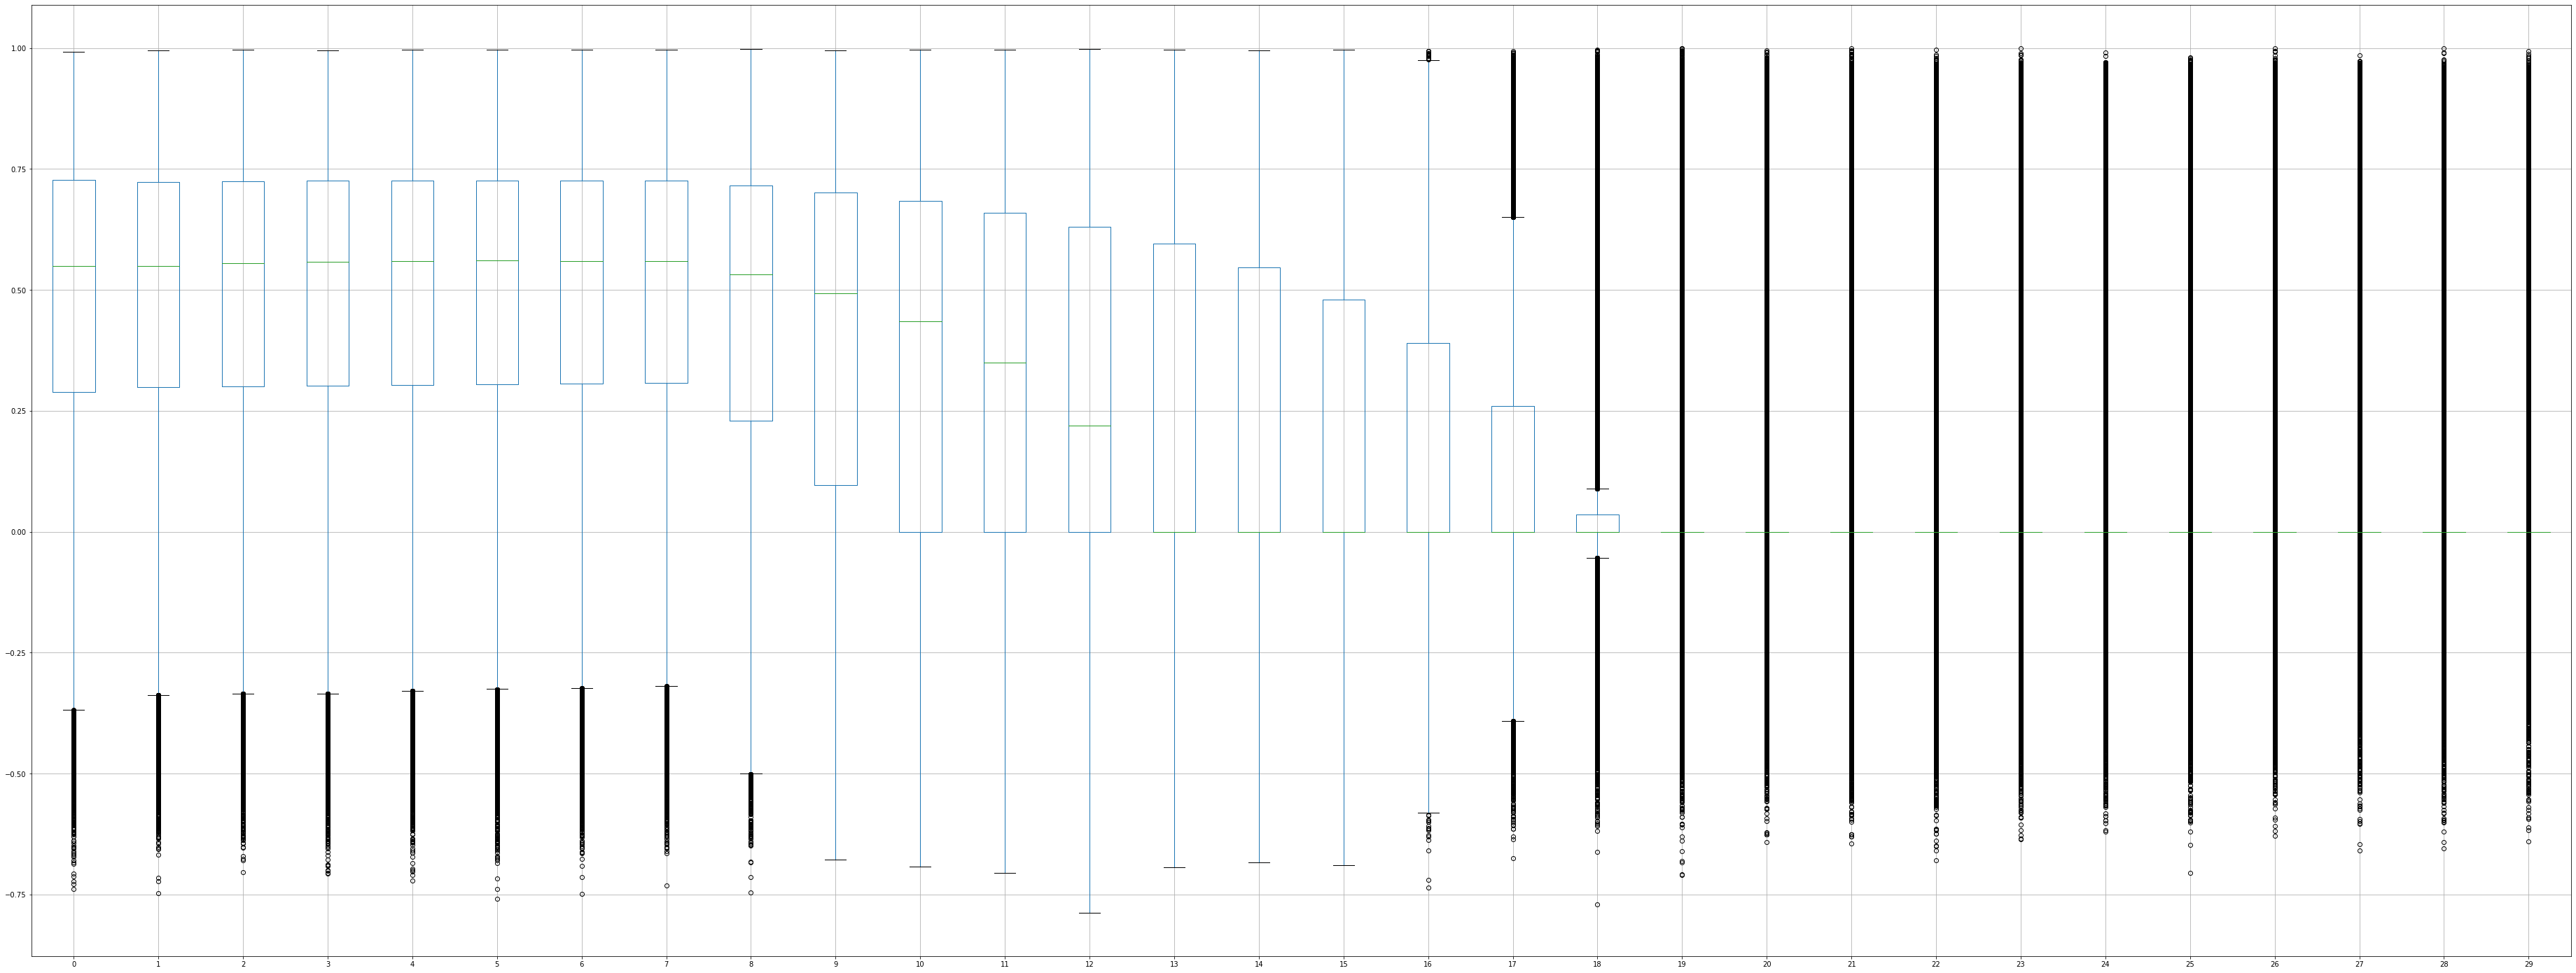

In [26]:
tmp_sub = BERT_cosine_similarity_dataframe_subtitle[[i for i in range(30)]]
tmp_sub.boxplot(figsize=(65,25))

## Lead Bias Function

In [2]:
x = np.linspace(0, 23, 24)
# y = np.where(np.arctan(-(x/1.8-10))*1/1.5 > 0, np.arctan(-(x/2-10))*1/1.5, 0)
y = np.arctan(-(x/2.4-10))*1/1.5 

In [3]:
np.arctan(-(x/2.4-10))*1/1.5 

array([0.98075178, 0.97788318, 0.97475674, 0.97133621, 0.96757827,
       0.96343066, 0.95882986, 0.95369781, 0.94793759, 0.94142738,
       0.93401204, 0.92549098, 0.91560051, 0.90398728, 0.89016756,
       0.87346262, 0.85289302, 0.82699931, 0.79352663, 0.7488509 ,
       0.68691788, 0.59737026, 0.46315885, 0.26319408])

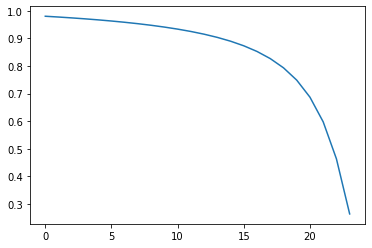

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()